In [1]:

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [5]:
dataset_path=("/kaggle/input/sportsceleb1")

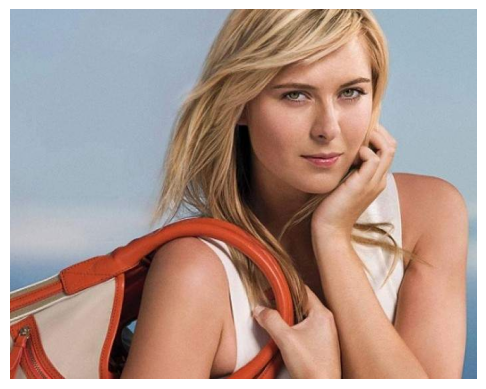

(555, 700, 3)

In [8]:
img = cv2.imread("/kaggle/input/testimage1/testimages/sharapova1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()
img.shape


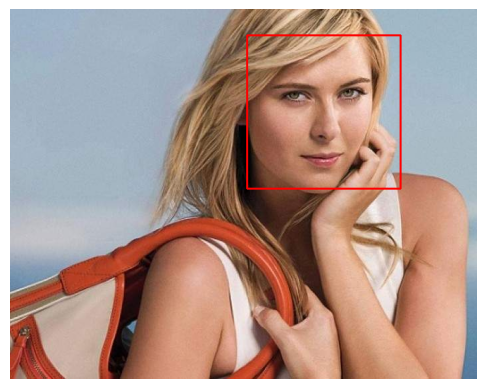

array([[355,  39, 230, 230]], dtype=int32)

In [9]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()
faces


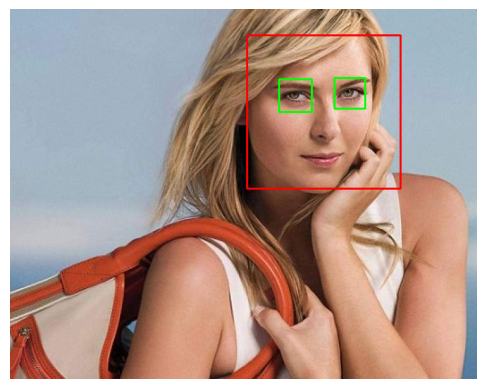

array([[486, 103,  46,  46],
       [403, 105,  49,  49]], dtype=int32)

In [10]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10)

for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(img_rgb, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()
eyes


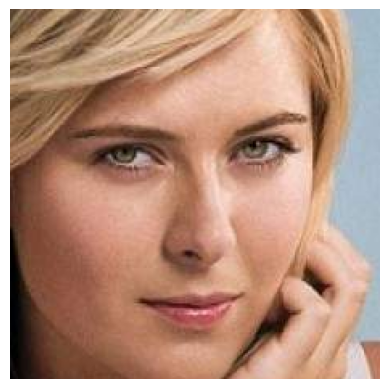

In [15]:
def crop_face(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    if len(faces) == 0:
        return None
    x, y, w, h = faces[0]
    cropped_face = img[y:y+h, x:x+w]
    return cropped_face

cropped_img = crop_face('/kaggle/input/testimage1/testimages/sharapova1.jpg')
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [17]:
def crop_face(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    if len(faces) == 0:
        return None
    x, y, w, h = faces[0]
    cropped_face = img[y:y+h, x:x+w]
    gray_cropped = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(gray_cropped, scaleFactor=1.1, minNeighbors=10)
    if len(eyes) < 2:
        return None
    return cropped_face


In [18]:
import os

sample_image = '/kaggle/input/testimage/sharapova2.JPG'
cropped_img = crop_face(sample_image)

if cropped_img is not None:
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No face detected in the image.")

No face detected in the image.


[ WARN:0@861.260] global loadsave.cpp:268 findDecoder imread_('/kaggle/input/testimage/sharapova2.JPG'): can't open/read file: check file path/integrity


In [20]:
import os
import cv2
import numpy as np

# Define dataset path
dataset_path = '/kaggle/input/sportsceleb1/dataset'

# Lists to store cropped images and labels
images = []
labels = []

# Iterate through the dataset
for celeb_name in os.listdir(dataset_path):
    celeb_path = os.path.join(dataset_path, celeb_name)
    if os.path.isdir(celeb_path):  # Ensure it's a directory
        for img_name in os.listdir(celeb_path):
            img_path = os.path.join(celeb_path, img_name)
            cropped = crop_face(img_path)  # Use your existing crop_face function
            if cropped is not None:
                # Resize to a fixed size for consistent feature extraction
                cropped = cv2.resize(cropped, (100, 100))  # Resize to 100x100
                images.append(cropped.flatten())  # Flatten for SVM input
                labels.append(celeb_name)  # Use folder name as label
            else:
                print(f"No face detected in {img_path}")

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print summary
print(f"Processed {len(images)} images.")
print(f"Unique celebrities: {np.unique(labels)}")

No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/maria-sharapova-wimbledon-championships-26062007-day-two-440nw-938536a.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/CRGF68.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/13409684982.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/image(8).png
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/O1CN01w3RKBq1Ld4G79HbyZ_!!6000000001321-2-tps-226-72(1).png
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/image(19).png
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/O1CN01mwvkG41mpsg9nz6OL_!!6000000005004-2-tps-714-260.png
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/paris-france-maria-sharapova-of-russia-kisses-the-coupe-suzanne-lenglen-after-the-womens.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/maria-sharapova(1).jpg
No face

libpng warning: iCCP: known incorrect sRGB profile


No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/maria-sharapova-4212120.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/sharapova-end.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/melbourne-australia-maria-sharapova-of-russia-practices-ahead-of-the-2020-australian-open-at.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/7200-list.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/london-maria-sharapova-of-russia-looks-dejected-during-the-round-two-womens-singles-match.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/image.gif
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/layout-0145e4b4ce640ed4.js
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/4335-b6460450b967a579.js
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/sharapova-usopen111.jpg
No face detected in /kaggle/input

libpng warning: iCCP: known incorrect sRGB profile


No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/O1CN01zMImQ01BwAKQvcMaD_!!6000000000009-2-tps-714-260.png
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/Maria_Sharapova_at_the_2009_Wimbledon_Championships_12.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/AP20057495281021.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/Maria_Sharapova_at_Wimbledon_2013_(cropped).jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/melbourne-australia-maria-sharapova-of-russia-celebrates-winning-match-point-after-her-second.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/33331-list.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/wimbledon-england-maria-sharapova-of-russia-walks-onto-court-prior-to-the-womens-singles-first.jpg
No face detected in /kaggle/input/sportsceleb1/dataset/MariaSharapova/2832.jpg
No face detected in /kaggle/input

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.88
Classification Report:
                precision    recall  f1-score   support

AB De Villiers       1.00      0.50      0.67         2
           CR7       1.00      1.00      1.00         3
MariaSharapova       0.88      1.00      0.93         7
  Rafael Nadal       0.67      1.00      0.80         2
 Ricky Ponting       1.00      0.50      0.67         2

      accuracy                           0.88        16
     macro avg       0.91      0.80      0.81        16
  weighted avg       0.90      0.88      0.86        16



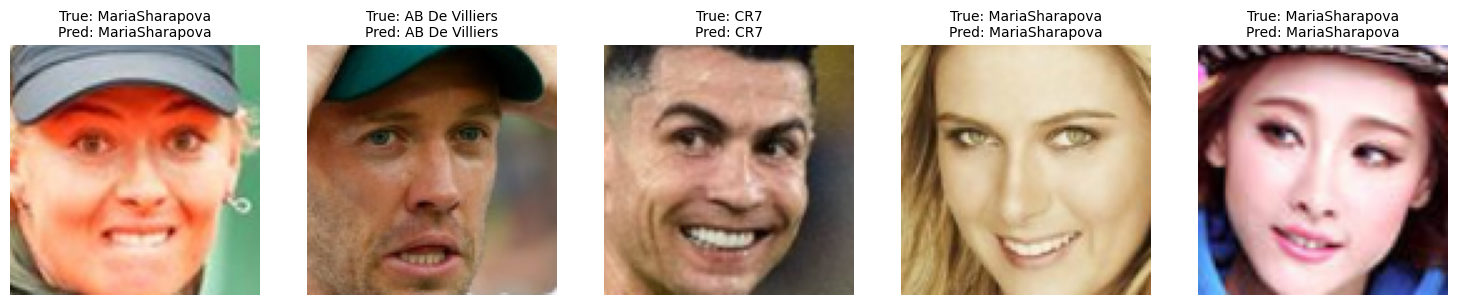

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure we have the test data and predictions from the previous cell
if 'X_test' not in globals() or 'y_test' not in globals() or 'y_pred' not in globals():
    print("Error: Test data or predictions not found. Please run the previous cell first.")
else:
    # Number of images to display
    num_images = min(5, len(X_test))  # Show up to 5 images

    # Set up the plot
    plt.figure(figsize=(15, 3))

    for i in range(num_images):
        # Reshape the flattened image back to (100, 100, 3)
        img = X_test[i].reshape(100, 100, 3).astype(np.uint8)
        
        # Create subplot
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}", fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

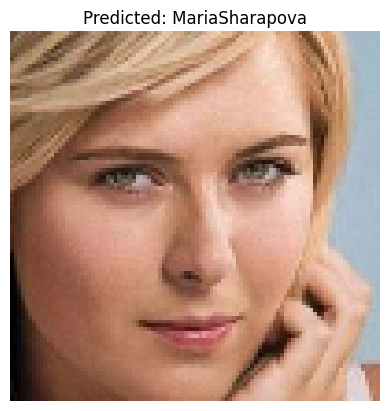

Predicted celebrity: MariaSharapova


In [26]:
import cv2
import numpy as np

# Path to the new image
new_image_path = '/kaggle/input/testimage1/testimages/sharapova1.jpg'

# Process the new image
cropped_img = crop_face(new_image_path)  # Use your existing crop_face function

if cropped_img is not None:
    # Preprocess the image to match training data
    cropped_img = cv2.resize(cropped_img, (100, 100))  # Resize to 100x100
    img_flattened = cropped_img.flatten().reshape(1, -1)  # Flatten and reshape for SVM
    img_scaled = scaler.transform(img_flattened)  # Scale using the same scaler as training

    # Predict the celebrity
    prediction = svm.predict(img_scaled)[0]
    
    # Display the cropped image and prediction
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {prediction}")
    plt.axis('off')
    plt.show()
    
    print(f"Predicted celebrity: {prediction}")
else:
    print(f"No face detected in {new_image_path}")

In [28]:
import joblib
import os
import json
import numpy as np

# Ensure the SVM model and scaler exist
if 'svm' not in globals() or 'scaler' not in globals():
    print("Error: Trained SVM model or scaler not found. Please run the training cell first.")
else:
    # Define output directory and file paths
    output_dir = '/kaggle/working'
    os.makedirs(output_dir, exist_ok=True)
    
    # Option 1: Save svm and scaler as separate .pkl files
    svm_path = os.path.join(output_dir, 'svm_model.pkl')
    scaler_path = os.path.join(output_dir, 'scaler.pkl')
    joblib.dump(svm, svm_path)
    joblib.dump(scaler, scaler_path)
    
    # Option 2: Save svm and scaler as a single .pkl file (if you prefer one file)
    combined_path = os.path.join(output_dir, 'combined_model.pkl')
    joblib.dump({'svm': svm, 'scaler': scaler}, combined_path)
    
    # Save metadata as .json (scaler parameters and class labels)
    metadata = {
        'scaler_mean': scaler.mean_.tolist() if hasattr(scaler, 'mean_') else [],
        'scaler_scale': scaler.scale_.tolist() if hasattr(scaler, 'scale_') else [],
        'class_labels': svm.classes_.tolist() if hasattr(svm, 'classes_') else [],
        'num_features': images.shape[1] if 'images' in globals() else 30000,  # 100x100x3
        'celebrities': np.unique(labels).tolist() if 'labels' in globals() else ['AB De Villiers', 'CR7', 'MariaSharapova', 'Rafael Nadal', 'Ricky Ponting']
    }
    json_path = os.path.join(output_dir, 'model_metadata.json')
    with open(json_path, 'w') as f:
        json.dump(metadata, f, indent=4)
    
    # Verify file creation
    print(f"SVM model saved to {svm_path}")
    print(f"Scaler saved to {scaler_path}")
    print(f"Combined model saved to {combined_path}")
    print(f"Metadata saved to {json_path}")
    
    if all(os.path.exists(p) for p in [svm_path, scaler_path, combined_path, json_path]):
        print("All files successfully created.")
    else:
        print("Error: Failed to create one or more files.")

SVM model saved to /kaggle/working/svm_model.pkl
Scaler saved to /kaggle/working/scaler.pkl
Combined model saved to /kaggle/working/combined_model.pkl
Metadata saved to /kaggle/working/model_metadata.json
All files successfully created.
